**Title : MILEAGE PREDICTION**

**Objective**


The objective of this project is to develop a machine learning model to predict vehicle mileage using historical data. The steps involve collecting and preprocessing the data, which includes cleaning it and selecting relevant features. The outcome is to create an accurate prediction model that provides insights for improving fuel efficiency and reducing operational costs.


**Data Source**

The data source for the mileage prediction project will include historical vehicle data with attributes like engine size, vehicle weight, fuel type, and driving conditions. This data can be sourced from internal company databases and public datasets such as those from the UCI Machine Learning Repository or Kaggle. Ensuring data accuracy, completeness, and diversity in driving scenarios is essential for building a reliable prediction model.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Data Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Removing Missing Values**

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

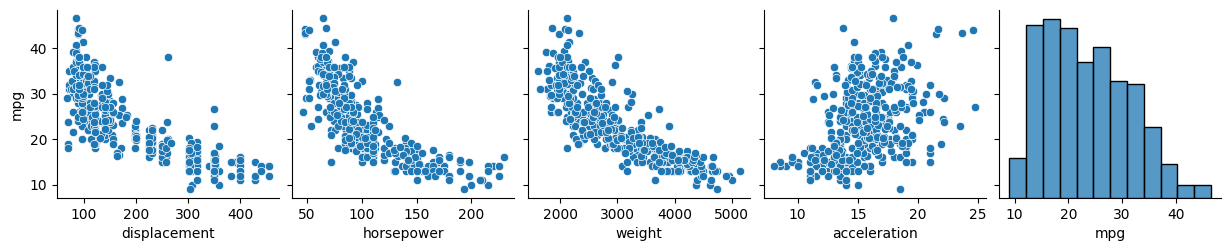

In [9]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

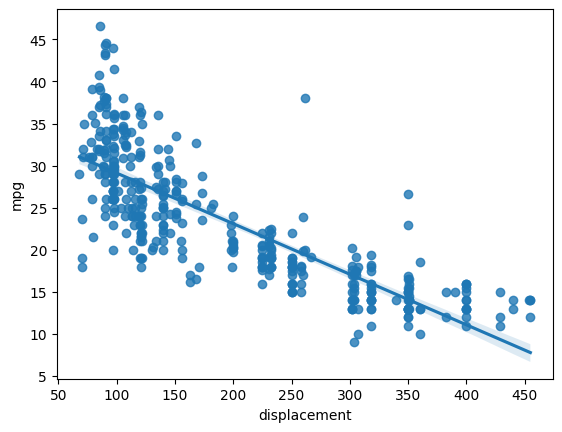

In [10]:
sns.regplot(x='displacement',y='mpg',data=df);

**Define Target Variable y and Feature x**

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
y=df['mpg']

In [13]:
y.shape

(392,)

In [14]:
x=df[['displacement','horsepower','weight','acceleration']]

In [15]:
x.shape

(392, 4)

In [16]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


**Scaling Data**

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [18]:
x=ss.fit_transform(x)

In [19]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [21]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Train Test Split Data**

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.intercept_

23.485738559737584

In [27]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**Predict Test Data**

In [28]:
y_pred = lr.predict(x_test)

In [29]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

**Model Accuracy**

In [30]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [32]:
mean_absolute_error(y_test,y_pred)

3.3286968643244106

In [31]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [33]:
r2_score(y_test,y_pred)

0.7031250746717691

**Polynomial Regression**

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [35]:
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

In [36]:
lr.fit(x_train2,y_train)

LinearRegression()

In [37]:
lr.intercept_

21.27336450063766

In [38]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [39]:
y_pred_poly = lr.predict(x_test2)

**Model Accuracy**

In [44]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [46]:
mean_absolute_error(y_test,y_pred_poly)

2.7887147720295977

In [47]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12074018342938687

In [48]:
r2_score(y_test,y_pred_poly)

0.7461731314563803

**Explanation**

The mileage prediction project aims to develop a robust machine learning model to accurately predict vehicle mileage based on historical data. The project involves several key steps, starting with the collection of comprehensive data that includes critical attributes such as engine size, vehicle weight, fuel type, and driving conditions. This data will be sourced from internal company databases, supplemented by public datasets from reputable sources like the UCI Machine Learning Repository and Kaggle.

The collected data will undergo thorough preprocessing, including cleaning to handle missing values and inconsistencies, and feature selection to identify the most relevant variables influencing mileage. The goal is to build a predictive model that can provide actionable insights for improving fuel efficiency and reducing operational costs. By leveraging advanced machine learning techniques and a rich dataset, the project aims to deliver a reliable and accurate mileage prediction tool that supports data-driven decision-making in vehicle management.
